## Clustering: Affinity Propagation

In [1]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from itertools import cycle

### Get Data

In [44]:
data = pd.read_csv('../datareader/score/old-score.csv')
data.index = data['phrase']
ndf = data.drop('phrase',axis =1)

In [45]:
ndf.head()

,Unnamed: 0,CVA,IHD,CM,ARR,VD,CHD
phrase,,,,,,,
"1,25-dihydroxyvitamin_d(3)_24-hydroxylase,_mitochondrial",0,0.000000,0.446767,0.000000,0.000000,0.0,0.000000
"1,4-alpha-glucan-branching_enzyme",1,0.290414,0.000000,1.035505,0.091431,0.0,0.372223
"1,5-anhydro-d-fructose_reductase",2,0.000000,0.000000,0.000000,0.000000,0.0,2.220267
1-phosphatidylinositol_3-phosphate_5-kinase,3,0.000000,0.000000,0.000000,0.308680,0.0,0.317226
"1-phosphatidylinositol_4,5-bisphosphate_phosphodiesterase_beta-1",4,0.000000,0.000000,0.472116,0.000000,0.0,0.000000


In [46]:
ndf.shape

(3175, 7)

### Split data

In [47]:
tdata = ndf.copy(deep =True)

In [48]:
cva_ihd = tdata.drop([ 'CM', 'ARR', 'VD', 'CHD'],axis =1)
cva_cm = tdata.drop([ 'IHD', 'ARR', 'VD', 'CHD'],axis =1)
cva_arr = tdata.drop([ 'IHD', 'CM', 'VD', 'CHD'],axis =1)
cva_vd = tdata.drop([ 'IHD', 'CM', 'ARR', 'CHD'],axis =1)
cva_chd = tdata.drop(['IHD', 'CM', 'ARR', 'VD'],axis =1)
ihd_cm = tdata.drop(['CVA', 'ARR', 'VD', 'CHD'],axis =1)
ihd_arr = tdata.drop(['CVA', 'CM', 'VD', 'CHD'],axis =1)
ihd_vd = tdata.drop(['CVA', 'CM', 'ARR', 'CHD'],axis =1)
ihd_chd = tdata.drop(['CVA', 'CM', 'ARR', 'VD'],axis =1)
cm_arr = tdata.drop(['CVA', 'IHD', 'VD', 'CHD'],axis =1)
cm_vd = tdata.drop(['CVA', 'IHD', 'ARR', 'CHD'],axis =1)
cm_chd = tdata.drop(['CVA', 'IHD', 'ARR', 'VD'],axis =1)
arr_vd = tdata.drop(['CVA', 'IHD', 'CM', 'CHD'],axis =1)
arr_chd = tdata.drop(['CVA', 'IHD', 'CM', 'VD'],axis =1)
vd_chd = tdata.drop(['CVA', 'IHD', 'CM', 'ARR'],axis =1)

In [88]:
def remover(df,cvd1,cvd2):
    
    protein = df.index
    d1 = df[cvd1]
    d2 = df[cvd2]
    DT = []
    c = 0.5
    cutoff = list(df.mean()+(c*df.std()))
    for p,a,b in zip(protein,d1,d2):
        if a > cutoff[0] or  b > cutoff[1] :
            DT.append({'protein': p, cvd1: a, cvd2: b},)
    dfr = pd.DataFrame(DT)
    dfr.index = dfr['protein']
    dfr = dfr.drop('protein',axis =1)
    return dfr

### Select Pair

In [92]:
cvd1 = 'ARR' #
cvd2 = 'CVA'
df = cva_arr
pref=-1.0

In [100]:
cvd1 = 'IHD' #
cvd2 = 'CVA'
df = cva_ihd
pref=-1.0

In [33]:
cvd1 = 'CM' #
cvd2 = 'CVA'
df = cva_cm
pref=-0.1

In [32]:
cvd1 = 'VD'  #
cvd2 = 'CVA'
df = cva_vd
pref=-0.1

In [51]:
cvd1 = 'CHD' #
cvd2 = 'CVA'
df = cva_chd
pref=-0.1

In [62]:
cvd1 = 'IHD'#
cvd2 = 'CM'
df = ihd_cm
pref=-0.1

In [73]:
cvd1 = 'IHD'#
cvd2 = 'ARR'
df = ihd_arr
pref=-0.1

In [84]:
cvd1 = 'IHD'#
cvd2 = 'VD'
df = ihd_vd
pref=-0.1

In [95]:
cvd1 = 'IHD' #
cvd2 = 'CHD'
df = ihd_chd
pref=-0.1

In [108]:
cvd1 = 'CM' #
cvd2 = 'ARR'
df = cm_arr
pref=-0.1

In [119]:
cvd1 = 'CM' #
cvd2 = 'VD'
df = cm_vd
pref=-0.1

In [130]:
cvd1 = 'CM'#
cvd2 = 'CHD'
df = cm_chd
pref=-0.1

In [141]:
cvd1 = 'ARR'#
cvd2 = 'VD'
df = arr_vd
pref=-0.1

In [152]:
cvd1 = 'ARR'#
cvd2 = 'CHD'
df = arr_chd
pref=-0.1

In [165]:
cvd1 = 'VD'#
cvd2 = 'CHD'
df = vd_chd
pref=-0.1

--------

In [101]:
rdf = remover(df,cvd1,cvd2)
rdf.head()

,CVA,IHD
protein,,
"1-phosphatidylinositol_4,5-bisphosphate_phosphodiesterase_delta-1",0.484608,0.000000
"2',3'-cyclic-nucleotide_3'-phosphodiesterase",2.739150,0.000000
3-hydroxy-3-methylglutaryl-coenzyme_a_reductase,1.006448,3.095639
43_kda_receptor-associated_protein_of_the_synapse,1.283404,0.169499
5-hydroxytryptamine_receptor_1a,0.846001,0.484862


In [102]:
rdf.shape

(628, 2)

In [103]:
X = rdf.copy(deep =True)
p = np.array(list(X.index))

### Affinity Propagation

In [104]:
# Compute Affinity Propagation
af = AffinityPropagation(preference = pref).fit(X)
indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters = len(indices)
n_clusters

23

### Data and Plot

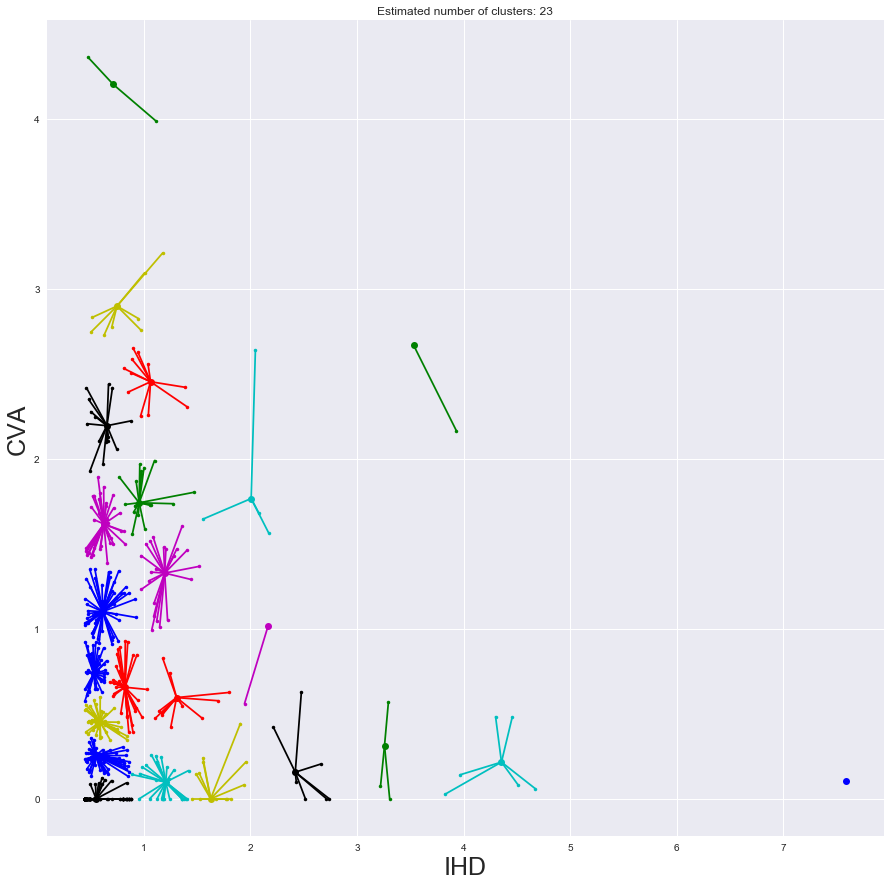

In [105]:
sns.set()
plt.figure(figsize = [15,15])
DTT =[]
X = np.array(X)
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X[indices[k]]
    ln = len(X[class_members, 0])
    if ln >1:
        for i in range(ln):
            DTT.append({'label': k,\
                        'protein': p[class_members][i],\
                        cvd1: X[class_members, 0][i],\
                        cvd2: X[class_members, 1][i],\
                        'color':col})
    else:
           
        DTT.append({'label': k,\
                        'protein': p[class_members][0],\
                        cvd1: X[class_members, 0][0],\
                        cvd2: X[class_members, 1][0],\
                        'color':col})
    
    # plot data
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    # plot center
    plt.plot(cluster_center[0], cluster_center[1], '.', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    # draw lines
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.xlabel(cvd1, fontsize = 25)
plt.ylabel(cvd2, fontsize = 25 )
plt.savefig('plot/'+cvd1+'-'+cvd2+'.pdf')
plt.show()

------

In [98]:
listdf = pd.DataFrame(DTT)
listdf.index = listdf['protein']
listdf = listdf.drop('protein',axis =1)
listdf.head(5)

,ARR,CVA,color,label
protein,,,,
"1-phosphatidylinositol_4,5-bisphosphate_phosphodiesterase_delta-1",0.000000,0.484608,b,0
5-hydroxytryptamine_receptor_2a,0.174764,0.555104,b,0
78_kda_glucose-regulated_protein,0.065296,0.529532,b,0
achaete-scute_homolog_1,0.000000,0.449759,b,0
adenylyl_cyclase-associated_protein_2,0.000000,0.449759,b,0


### Add Uniprot

In [27]:
data = pd.read_csv('uniprot.csv')
data.index = data['protein']
udf = data.drop('protein',axis =1)
udf.head()

,uniprot_id,gene_names,has_multiple_IDs
protein,,,
natriuretic_peptides_b,P16860,NPPB,NaN
angiotensin-converting_enzyme,P12821,ACE DCP DCP1,NaN
potassium_voltage-gated_channel_subfamily_h_member_2,Q12809,KCNH2 ERG ERG1 HERG,NaN
c-reactive_protein,P02741,CRP PTX1,NaN
apolipoprotein_e,P02649,APOE,NaN


In [28]:
idx_cvd = list(listdf.index)
idx_uprt =  list(udf.index)

prot_dict = []
for item in idx_cvd:
    data = listdf.loc[item,:]
    if item in idx_uprt:
         prot_dict.append({'Protein':item,\
                     cvd1:data[0],\
                     cvd2:data[1],\
                     'color':data[2],\
                     'label': data[3],\
                     'uprot':udf.loc[item,:][0]})
        
    else:
        print(item,'Match not Found')
        prot_dict.append({'Protein':item,\
                     cvd1:data[0],\
                     cvd2:data[1],\
                     'color':data[2],\
                     'label': data[3],\
                     'uprot':'NAN'})
        
        

In [29]:
resultdf = pd.DataFrame(prot_dict)
resultdf.index = resultdf['Protein']
resultdf = resultdf.drop('Protein',axis =1)
resultdf.head(10)

,CVA,IHD,color,label,uprot
Protein,,,,,
brain-derived_neurotrophic_factor,0.492909,0.026065,b,0,P23560
alpha-galactosidase_a,0.488128,0.003105,b,0,P06280
neurotrophin-3,0.510094,0.025944,b,0,P20783
tetraspanin-33,0.686945,0.003340,b,0,Q86UF1
"glutamate_receptor_ionotropic,_nmda_2c",0.479266,0.051119,b,0,Q14957
nestin,0.404329,0.040345,b,0,P48681
"glutamate_receptor_ionotropic,_nmda_2b",0.480174,0.050999,b,0,Q13224
"glutamate_receptor_ionotropic,_nmda_1",0.479685,0.051063,b,0,Q05586
microtubule-associated_protein_2,0.520331,0.000000,b,0,P11137


In [30]:
resultdf.to_csv('data/' + cvd1 + '-' + cvd2 + '.csv')